In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

data =  pd.read_excel('중구_안심벨_후보지.xlsx')
gs = gpd.GeoSeries.from_wkt(data['노드 WKT'])
df = gpd.GeoDataFrame(data, geometry = gs, crs = 'epsg:4326')

In [101]:
df['경도']= df['geometry'].x
df['위도'] = df['geometry'].y

In [102]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '노드링크 유형', '노드 WKT', '노드 ID', '노드 유형 코드',
       '링크 WKT', '링크 ID', '링크 유형 코드', '시작노드 ID', '종료노드 ID', '링크 길이', '시군구코드',
       '시군구명', '읍면동코드', '읍면동명', '고가도로', '지하철네트워크', '교량', '터널', '육교', '횡단보도',
       '공원,녹지', '건물내', '행정동코드', 'CCTV_100m', '숙박업소_100m', '유흥업소_100m',
       '경찰서_500m', '비아파트_25m', '취약계층_평균(생활인구)', 'CCTV_100m_std',
       '숙박업소_100m_std', '유흥업소_100m_std', '경찰서_500m_std', '비아파트_25m_std',
       '취약계층_평균(생활인구)_std', '범죄종합점수', 'geometry', '수요충족여부', '경도', '위도'],
      dtype='object')

In [103]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', '노드링크 유형', '노드 WKT', '노드 ID', '노드 유형 코드',
       '링크 WKT', '링크 ID', '링크 유형 코드', '시작노드 ID', '종료노드 ID', '링크 길이',
             '시군구명', '읍면동코드', '읍면동명', '고가도로', '지하철네트워크', '교량', '터널', '육교', '횡단보도',
             '공원,녹지', '건물내', 'geometry'], axis=1)
df.head()

,시군구코드,행정동코드,CCTV_100m,숙박업소_100m,유흥업소_100m,경찰서_500m,비아파트_25m,취약계층_평균(생활인구),CCTV_100m_std,숙박업소_100m_std,유흥업소_100m_std,경찰서_500m_std,비아파트_25m_std,취약계층_평균(생활인구)_std,범죄종합점수,수요충족여부,경도,위도
0,1114000000,11140605,2,0,0,0,7,682.044172,0.2,0.000000,0.0,0.00,0.233333,0.378868,0.109662,0,127.001385,37.568187
1,1114000000,11140615,1,0,0,1,5,871.051758,0.1,0.000000,0.0,0.25,0.166667,0.577369,0.075842,0,127.016978,37.567629
2,1114000000,11140540,1,0,0,3,0,1016.201138,0.1,0.000000,0.0,0.75,0.000000,0.729810,-0.056562,1,126.976466,37.554274
3,1114000000,11140670,1,4,0,0,1,575.020352,0.1,0.266667,0.0,0.00,0.033333,0.266468,0.063600,0,127.019174,37.566175
4,1114000000,11140680,4,0,0,1,15,321.297188,0.4,0.000000,0.0,0.25,0.500000,0.000000,0.042400,1,126.963295,37.557973


In [104]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df.head()

,시군구코드,행정동코드,CCTV_100m,숙박업소_100m,유흥업소_100m,경찰서_500m,비아파트_25m,취약계층_평균(생활인구),CCTV_100m_std,숙박업소_100m_std,유흥업소_100m_std,경찰서_500m_std,비아파트_25m_std,취약계층_평균(생활인구)_std,범죄종합점수,수요충족여부,경도,위도
0,1114000000,11140605,2,0,0,0,7,682.044172,0.2,0.000000,0.0,0.00,0.233333,0.378868,0.109662,0,127.001385,37.568187
1,1114000000,11140615,1,0,0,1,5,871.051758,0.1,0.000000,0.0,0.25,0.166667,0.577369,0.075842,0,127.016978,37.567629
2,1114000000,11140540,1,0,0,3,0,1016.201138,0.1,0.000000,0.0,0.75,0.000000,0.729810,-0.056562,1,126.976466,37.554274
3,1114000000,11140670,1,4,0,0,1,575.020352,0.1,0.266667,0.0,0.00,0.033333,0.266468,0.063600,0,127.019174,37.566175
4,1114000000,11140680,4,0,0,1,15,321.297188,0.4,0.000000,0.0,0.25,0.500000,0.000000,0.042400,1,126.963295,37.557973


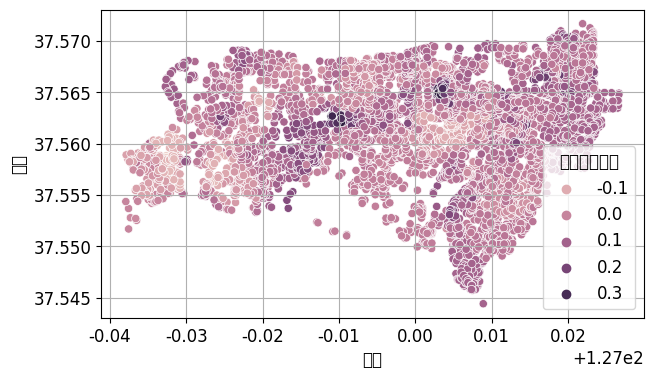

In [106]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='경도', y='위도', hue='범죄종합점수', data=df)
plt.grid()
plt.show()
plt.close()

In [107]:
import pandas as pd


# 필요한 열 선택
data = df[['경도', '위도', '범죄종합점수']]

In [115]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# KMeans 군집화
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters

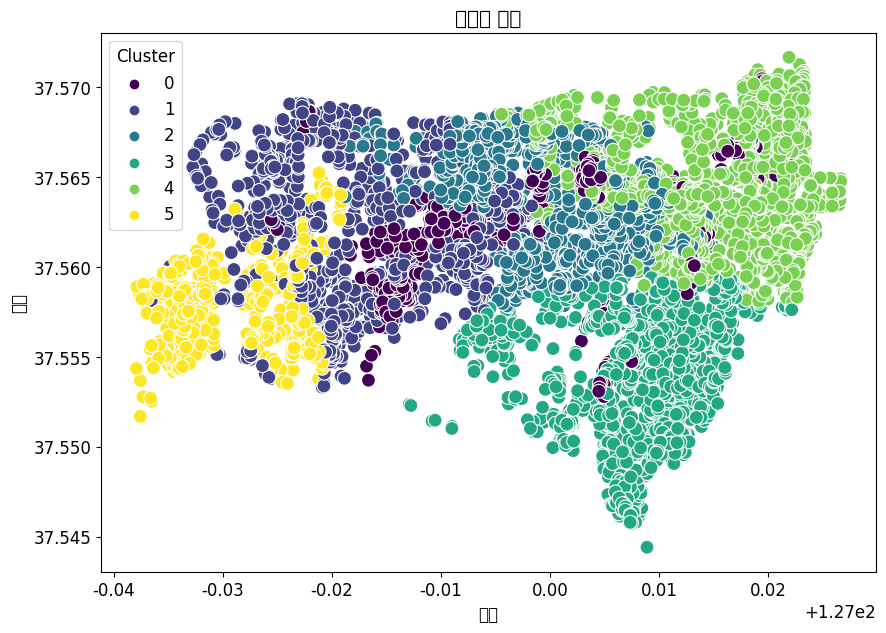

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='경도', y='위도', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('군집화 결과')
plt.show()

In [117]:
# 각 군집의 범죄종합점수 평균 계산
cluster_means = df.groupby('Cluster')['범죄종합점수'].mean()

print(cluster_means)

Cluster
0    0.169341
1    0.054498
2   -0.018054
3    0.039415
4    0.069150
5   -0.058170
Name: 범죄종합점수, dtype: float64
